# Compare trials by sessions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt
import qgrid
#from nma_class import loader
#from nma_class_Copy1 import loa|der
#from nma_class_Copy1 import eda



%matplotlib inline
from nma_class2 import loader
from nma_class2 import eda

from nma_class2 import pca
pca = pca()
from nma_class2 import glm
glm = glm()
%matplotlib notebook

In [2]:
## NOT CHANGED

main_folder = '/Volumes/GoogleDrive/My Drive/NMA_Dataset/Dataset_1'
# initialize loader object
loader_obj = loader(main_folder)
# get available sessions
all_session_folders, all_session_names = loader_obj.get_available_session()
# load default session 
session_folder = all_session_folders[38]
session_name =  all_session_names[38]
session = loader_obj.load_session(session_folder, fast=True)#, update=True)
#channels_df = session['channels_df']
spikes_df = session['spikes_df']
clusters_df = session['clusters_df']
# drop bad clusters
clusters_df.drop(clusters_df[clusters_df['label']=='bad'].index, axis=0, inplace=True)
trials_df = session['trials_df']
# drop not included trials
trials_df.drop(trials_df[~trials_df['included']].index, axis=0, inplace=True)
trials_df.drop('included', axis=1, inplace=True)
# insert trial length
trials_df.insert(7, 'trial length', (trials_df['end time']-trials_df['start time']) )

In [65]:
main_folder = '/Volumes/GoogleDrive/My Drive/NMA_Dataset/Dataset_1'
# initialize loader object
loader_obj = loader(main_folder)
# get available sessions
all_session_folders, all_session_names = loader_obj.get_available_session()
# load default session 
session_folder = all_session_folders[38]
session_name =  all_session_names[38]
session = loader_obj.load_session(session_folder, fast=True)#, update=True)
#channels_df = session['channels_df']
spikes_df = session['spikes_df']
clusters_df = session['clusters_df']
# drop bad clusters
clusters_df.drop(clusters_df[clusters_df['label']=='bad'].index, axis=0, inplace=True)





trials_df = session['trials_df']
# select the included trials
trials_df = trials_df.loc[trials_df['included']==True]

# insert trial length
trials_df.insert(7, 'trial length', (trials_df['end time']-trials_df['start time']) )

# select the no go trials
#no_contrast_trials_df = trials_df.loc[(trials_df['stim contrast left']==0) 
#                                       & (trials_df['stim contrast right']==0)]
# response choice
# create data frame only with the correct rejection
#correctrejection_df = no_contrast_trials_df.loc[(no_contrast_trials_df['response choice']==0)]
# create data frame only with the false alarms
#falsealarms_df = no_contrast_trials_df.loc[(no_contrast_trials_df['response choice']==1) 
#                                           | (no_contrast_trials_df['response choice']==-1)]

In [78]:
trials_df = correctrejection_df
# insert trial length
trials_df.insert(7, 'trial length', (trials_df['end time']-trials_df['start time']) )

ValueError: cannot insert trial length, already exists

In [ ]:
trials_df = falsealarms_df
# insert trial length
trials_df.insert(7, 'trial length', (trials_df['end time']-trials_df['start time']) )

In [3]:
#perfomr pca:

# specify window for mean firing rate in milli seconds
window = 10
spikes = clusters_df['spikes']
# specify event to find mena firing rate around
event = 'stim time'
events = trials_df[event]
# get data matrix
X = pca.get_data_matrix(events, spikes, window)
# perform PCA
score, evectors, evals = pca.pca(X)

<IPython.core.display.Javascript object>


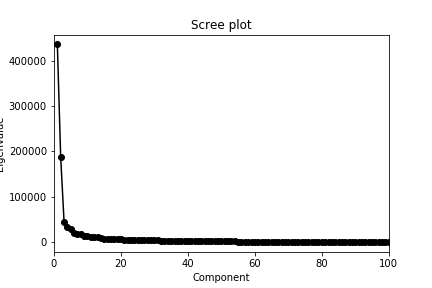

In [4]:
#plot the eigenvalues
pca.plot_eigenvalues(evals)
plt.xlim([0, 100])  # limit x-axis up to 100 for zooming
plt.show()

<IPython.core.display.Javascript object>


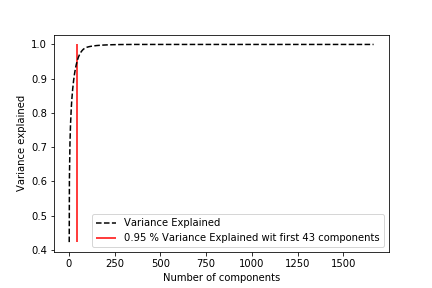

In [5]:
# calculate the variance explained
variance_explained = pca.get_variance_explained(evals)
# Uncomment to plot the variance explained
pca.plot_variance_explained(variance_explained, 0.95)
plt.show()

<IPython.core.display.Javascript object>


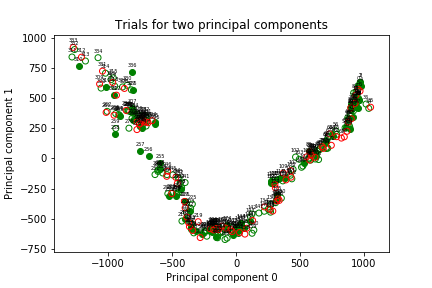

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a259af990>)

In [16]:
# initialize figure and axis
fig, ax = plt.subplots()
## plot trials different colour depending on stim sice
# get bool selector
stim = np.logical_or(trials_df['stim contrast left']!=0, trials_df['stim contrast right']!=0)
## plot trials different shape based on correct choice
# get bool selector
correct = (trials_df['feedback type']==1)
# plot trials with stim and correct
select = np.logical_and(stim, correct)
pca.plot_pca_scatter(score[select], 0, 1, events[select].index.values, print_labels=True, facecolor='g', edgecolor='g', fig=fig, ax=ax)
# plot trials without stim and correct
select = np.logical_and(~stim, correct)
pca.plot_pca_scatter(score[select], 0, 1, events[select].index.values, print_labels=True, facecolor='none', edgecolor='g', fig=fig, ax=ax)
# plot not stim trials and incorrect
#select = np.logical_and(stim, ~correct)
#pca.plot_pca_scatter(score[select], 0, 1, events[select].index.values, print_labels=True, facecolor='r', edgecolor='r', fig=fig, ax=ax)
# plot trials without stim and incorrect
select = np.logical_and(~stim, ~correct)
pca.plot_pca_scatter(score[select], 0, 1, events[select].index.values, print_labels=True, facecolor='none', edgecolor='r', fig=fig, ax=ax)

<IPython.core.display.Javascript object>


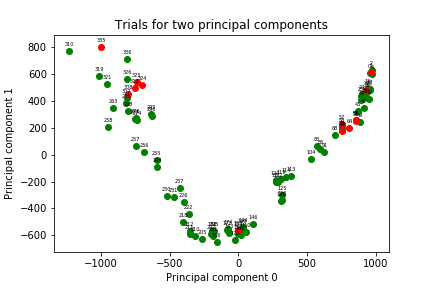

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a24669850>)

In [7]:
# initialize figure and axis
fig, ax = plt.subplots()
## plot trials different colour depending on stim sice
# get bool selector
stim = np.logical_or(trials_df['stim contrast left']!=0, trials_df['stim contrast right']!=0)
## plot trials different shape based on correct choice
# get bool selector
correct = (trials_df['feedback type']==1)
# plot trials with stim and correct
select = np.logical_and(stim, correct)
pca.plot_pca_scatter(score[select], 0, 1, events[select].index.values, print_labels=True, facecolor='g', edgecolor='g', fig=fig, ax=ax)
# plot trials without stim and correct
#select = np.logical_and(~stim, correct)
#pca.plot_pca_scatter(score[select], 0, 1, events[select].index.values, print_labels=True, facecolor='none', edgecolor='g', fig=fig, ax=ax)
# plot not stim trials and incorrect
select = np.logical_and(stim, ~correct)
pca.plot_pca_scatter(score[select], 0, 1, events[select].index.values, print_labels=True, facecolor='r', edgecolor='r', fig=fig, ax=ax)
# plot trials without stim and incorrect
#select = np.logical_and(~stim, ~correct)
#pca.plot_pca_scatter(score[select], 0, 1, events[select].index.values, print_labels=True, facecolor='none', edgecolor='r', fig=fig, ax=ax)

<IPython.core.display.Javascript object>


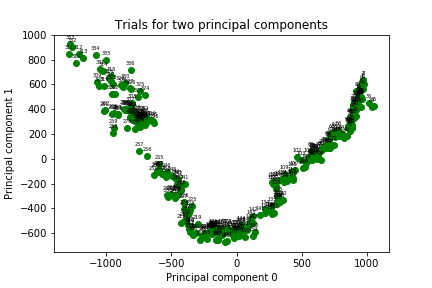

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a24e05590>)

In [9]:
fig, ax = plt.subplots()
## plot trials different colour depending on stim sice
# get bool selector
stim = np.logical_or(trials_df['stim contrast left']!=0, trials_df['stim contrast right']!=0)
## plot trials different shape based on correct choice
# get bool selector
correct = (trials_df['feedback type']==1)
pca.plot_pca_scatter(score, 0, 1, events.index.values, print_labels=True, facecolor='g', edgecolor='g', fig=fig, ax=ax)

In [11]:
fig, ax, anim = pca.plot_pca_scatter_animated(score, 0, 1, fig=None, ax=None, line_col='grey', line_width=1, 
                         maker_shape='o', marker_col='red', marker_facecol='red', marker_size=4)
plt.show()
# save animation
#plot_folder = "E:/3 Projekte/Neuromatch Summer School/Projekt/plots"
#f = os.path.join(plot_folder, 'pca_animation.gif')
writergif = animation.PillowWriter(fps=30) 
anim.save(f, writer=writergif)

<IPython.core.display.Javascript object>

NameError: name 'animation' is not defined

<IPython.core.display.Javascript object>


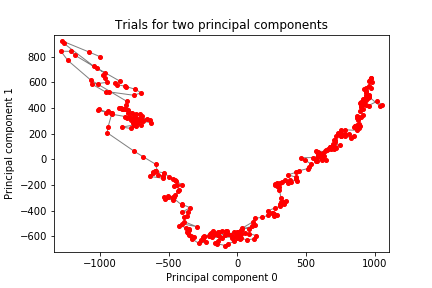

NameError: name 'animation' is not defined

In [71]:
fig, ax, anim = pca.plot_pca_scatter2_animated(score, 0, 1, fig=None, ax=None, line_col='grey', line_width=1, 
                         maker_shape='o', marker_col='red', marker_facecol='red', marker_size=4)
plt.show()
# save animation
#plot_folder = "E:/3 Projekte/Neuromatch Summer School/Projekt/plots"
#f = os.path.join(plot_folder, 'pca_animation.gif')
writergif = animation.PillowWriter(fps=30) 
anim.save(f, writer=writergif)

### first session

In [17]:
# for the first session: 

# link to parent folder with all datasets
main_folder = '/Volumes/GoogleDrive/My Drive/NMA_Dataset/Dataset_1'

# initialize loader object
loader = loader(main_folder)

# get available sessions
all_session_folders, all_session_names = loader.get_available_session()

session_folder = all_session_folders[0]
session_name =  all_session_names[0]
session = loader.load_session(session_folder, fast=True)

spikes_df = session['spikes_df']
clusters_df = session['clusters_df']
trials_df = session['trials_df']

In [11]:
# for the first session: 

# link to parent folder with all datasets
#main_folder = '/Volumes/GoogleDrive/My Drive/NMA_Dataset/Dataset_1'

# initialize loader object
#loader = loader(main_folder)

# get available sessions
all_session_folders, all_session_names = loader.get_available_session()

session_folder = all_session_folders[25]
session_name =  all_session_names[25]
session = loader.load_session(session_folder, fast=True)

spikes_df = session['spikes_df']
clusters_df = session['clusters_df']
trials_df = session['trials_df']


# TRIALS ===================================================
# select the included trials
trials_df2 = trials_df.loc[trials_df['included']==True]

# select the no go trials
no_contrast_trials_df = trials_df2.loc[(trials_df2['stim contrast left']==0) & (trials_df2['stim contrast right']==0)]

# response choice
'''
Explanation
response_choice.npy [enumerated type] (nTrials) 
The response registered at the end of the trial, which determines the feedback according to the contrast condition. 
Note that in a small percentage of cases (~4%, see manuscript Methods) the initial wheel turn was in the opposite direction. 
-1 for Right choice (i.e. correct when stimuli are on the right); 
+1 for left choice; 
0 for Nogo choice.
'''
# create data frame only with the correct rejection
correctrejection_df = no_contrast_trials_df.loc[(no_contrast_trials_df['response choice']==0)]
''' some of the trials give feedback = -1 ... ??????? we can join the feedback = 1: '''
#correctrejection_df = no_contrast_trials_df.loc[(no_contrast_trials_df['response choice']==0) 
#                                                & (no_contrast_trials_df['feedback type']==1)]



# create data frame only with the false alarms
'''same happens here'''
falsealarms_df = no_contrast_trials_df.loc[(no_contrast_trials_df['response choice']==1) 
                                           | (no_contrast_trials_df['response choice']==-1)]
#falsealarms_df = no_contrast_trials_df.loc[((no_contrast_trials_df['response choice']==1) 
#                                           | (no_contrast_trials_df['response choice']==-1))
#                                           & (no_contrast_trials_df['feedback type']==-1)]





nocontrast_trials = len(no_contrast_trials_df)
correct_rej = len(correctrejection_df)
false_alarm = len(falsealarms_df)

df1 = ''
df1 = {'session name': [session_name],
      'no contrast trials': [nocontrast_trials],
      'correct rejection': [correct_rej], 
      'false alarm': [false_alarm], 
      
      #'%Correct': [round(crrct/all_t*100,2)], 
       #'%Contrast':[round(cont/crrct*100,2)], 
       #'%0contrast':[round(nocont/crrct*100,2)]
      }

df2 = pd.DataFrame(data=df1)

df3 = df2

In [12]:
df3

,session name,no contrast trials,correct rejection,false alarm
0,Radnitz_2017-01-09,92,31,61


### other sessions


In [21]:
#for the other sessions 

# load default session 
# put here any integer instead of 0 or directly the folder of the session
for i in range(1,len(all_session_folders)): 
    session_folder = all_session_folders[i]
    session_name =  all_session_names[i]
    session = loader.load_session(session_folder, fast=True)

    spikes_df = session['spikes_df']
    clusters_df = session['clusters_df']
    trials_df = session['trials_df']
    
        # TRIALS ===================================================
    # select the included trials
    trials_df2 = trials_df.loc[trials_df['included']==True]

    # select the no go trials
    no_contrast_trials_df = trials_df2.loc[(trials_df2['stim contrast left']==0) & (trials_df2['stim contrast right']==0)]

    # response choice
    '''
    Explanation
    response_choice.npy [enumerated type] (nTrials) 
    The response registered at the end of the trial, which determines the feedback according to the contrast condition. 
    Note that in a small percentage of cases (~4%, see manuscript Methods) the initial wheel turn was in the opposite direction. 
    -1 for Right choice (i.e. correct when stimuli are on the right); 
    +1 for left choice; 
    0 for Nogo choice.
    '''
    # create data frame only with the correct rejection
    correctrejection_df = no_contrast_trials_df.loc[(no_contrast_trials_df['response choice']==0)]
    ''' some of the trials give feedback = -1 ... ??????? we can join the feedback = 1: '''
    #correctrejection_df = no_contrast_trials_df.loc[(no_contrast_trials_df['response choice']==0) 
    #                                                & (no_contrast_trials_df['feedback type']==1)]



    # create data frame only with the false alarms
    '''same happens here'''
    falsealarms_df = no_contrast_trials_df.loc[(no_contrast_trials_df['response choice']==1) 
                                               | (no_contrast_trials_df['response choice']==-1)]
    #falsealarms_df = no_contrast_trials_df.loc[((no_contrast_trials_df['response choice']==1) 
    #                                           | (no_contrast_trials_df['response choice']==-1))
    #                                           & (no_contrast_trials_df['feedback type']==-1)]





    nocontrast_trials = len(no_contrast_trials_df)
    correct_rej = len(correctrejection_df)
    false_alarm = len(falsealarms_df)

    df1 = ''
    df1 = {'session name': [session_name],
          'no contrast trials': [nocontrast_trials],
          'correct rejection': [correct_rej], 
          'false alarm': [false_alarm], 

          #'%Correct': [round(crrct/all_t*100,2)], 
           #'%Contrast':[round(cont/crrct*100,2)], 
           #'%0contrast':[round(nocont/crrct*100,2)]
          }

    df2 = pd.DataFrame(data=df1)

    df3 = df3.append(df2)

In [22]:
df3

,session name,no contrast trials,correct rejection,false alarm
0,Cori_2016-12-14,116,48,68
0,Cori_2016-12-17,140,56,84
0,Cori_2016-12-18,142,59,83
0,Forssmann_2017-11-01,161,99,62
0,Forssmann_2017-11-02,151,81,70
0,Forssmann_2017-11-04,181,82,99
0,Forssmann_2017-11-05,169,53,116
0,Hench_2017-06-15,108,49,59
0,Hench_2017-06-16,209,88,121
0,Hench_2017-06-17,261,115,146


In [23]:
# adjust the df index 

df3.set_index("session name", inplace = True) 

#add new column to existing df
# creating a new column session_number 
df3['session_number'] = ''
df3['session_number'][0] = 0
for i in range(1,len(df3)): 
    df3['session_number'][i] = (df3['session_number'][i-1]) +1
df3

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,no contrast trials,correct rejection,false alarm,session_number
session name,,,,
Cori_2016-12-14,116,48,68,0
Cori_2016-12-17,140,56,84,1
Cori_2016-12-18,142,59,83,2
Forssmann_2017-11-01,161,99,62,3
Forssmann_2017-11-02,151,81,70,4
Forssmann_2017-11-04,181,82,99,5
Forssmann_2017-11-05,169,53,116,6
Hench_2017-06-15,108,49,59,7
Hench_2017-06-16,209,88,121,8


In [13]:
#to save
#df3.to_csv (r'/Users/kcenia/Documents/GitHub/NMA_project/kce/trials_comparison_df.csv', index = False, header=True)

## To plot the trials

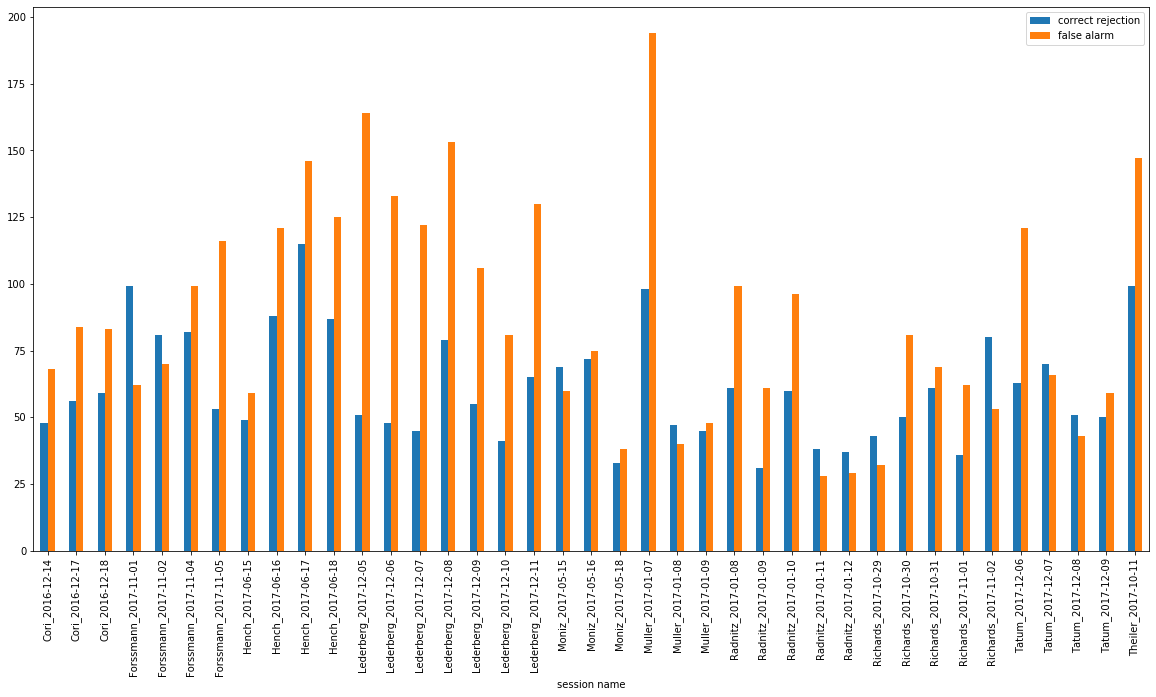

In [29]:

df4 = df3['correct rejection']
#df4 = pd.concat([df4, df3['all trials']], axis=1, sort=False)
#df4 = pd.concat([df4, df3['no contrast trials']], axis=1, sort=False)
df4 = pd.concat([df4, df3['false alarm']], axis=1, sort=False)  

figure = df4.plot.bar(figsize=(20,10));


In [16]:
#save the figure
#figure.figure.savefig('trials_comparison_included.png')

# Compare trials by cluster

Cori_2016-12-14 rec areas:  ['ACA' 'CA3' 'DG' 'LS' 'MOs' 'SUB' 'VISp' 'root']

Cori_2016-12-17 rec areas:  ['CA1' 'POST' 'VISl' 'VISpm' 'root']

Cori_2016-12-18 rec areas:  ['CA1' 'DG' 'LP' 'MG' 'MRN' 'NB' 'POST' 'SPF' 'VISam' 'VISp' 'root']

Forssmann_2017-11-01 rec areas:  ['ACA' 'CA1' 'DG' 'LGd' 'LSr' 'MOs' 'SUB' 'TH' 'VISa' 'VISp' 'VPL']

Forssmann_2017-11-02 rec areas:  ['ACA' 'CA1' 'DG' 'MOs' 'OLF' 'ORB' 'PL' 'SUB' 'VISa' 'root']

Forssmann_2017-11-04 rec areas:  ['AUD' 'CA1' 'SSp' 'TH' 'root']

Forssmann_2017-11-05 rec areas:  ['CA3' 'CP' 'EPd' 'LD' 'PIR' 'SSp' 'VPL' 'root']

Hench_2017-06-15 rec areas:  ['CA1' 'CA3' 'DG' 'ILA' 'LD' 'LP' 'LSr' 'MOs' 'PL' 'PO' 'SUB' 'TT' 'VISa'
'VISp' 'root']

Hench_2017-06-16 rec areas:  ['CA1' 'CA3' 'LD' 'LSr' 'ORBm' 'PL' 'TH' 'TT' 'VISam' 'VISl' 'VPL' 'root']

Hench_2017-06-17 rec areas:  ['CA1' 'DG' 'GPe' 'MB' 'MRN' 'POL' 'POST' 'SCm' 'SCsg' 'VISl' 'VISp'
'VISrl' 'root']

Hench_2017-06-18 rec areas:  ['CP' 'LSc' 'LSr' 'MOp' 'PT' 'root']

Lederberg_2017-12-05 rec areas:  ['ACA' 'CA1' 'DG' 'LGd' 'LH' 'MD' 'MOs' 'PL' 'SUB' 'VISam' 'VISp' 'root']

Lederberg_2017-12-06 rec areas:  ['ACA' 'CA1' 'DG' 'LGd' 'MB' 'MOs' 'MRN' 'MS' 'PL' 'RN' 'SCm' 'SCs'
'VISam' 'ZI' 'root']

Lederberg_2017-12-07 rec areas:  ['CA1' 'MOs' 'MRN' 'ORB' 'PAG' 'RSP' 'SCm' 'SCs' 'VISp' 'root']

Lederberg_2017-12-08 rec areas:  ['BLA' 'CA3' 'GPe' 'LGd' 'MB' 'VPM' 'ZI' 'root']

Lederberg_2017-12-09 rec areas:  ['CA3' 'LGd' 'MB' 'SSp' 'SSs' 'TH' 'root']

Lederberg_2017-12-10 rec areas:  ['LD' 'MEA' 'RT' 'VPL' 'VPM' 'root']

Lederberg_2017-12-11 rec areas:  ['ACB' 'CA3' 'CP' 'LGd' 'OT' 'SI' 'SNr' 'TH' 'ZI' 'root']

Moniz_2017-05-15 rec areas:  ['APN' 'CA1' 'DG' 'LP' 'POL' 'SUB' 'VISam' 'VISpm' 'root']

Moniz_2017-05-16 rec areas:  ['CA1' 'DG' 'LGd' 'LP' 'MG' 'SPF' 'SUB' 'TH' 'VISa' 'VISp' 'root']

Moniz_2017-05-18 rec areas:  ['LD' 'MOp' 'SSp' 'VAL' 'root']

Muller_2017-01-07 rec areas:  ['ACA' 'ACB' 'IC' 'MOs' 'MRN' 'PL' 'RSP' 'SCsg' 'TT' 'VISp' 'root']

Muller_2017-01-08 rec areas:  ['CA1' 'DG' 'LP' 'PO' 'VISam' 'root']

Muller_2017-01-09 rec areas:  ['CA1' 'CA2' 'MRN' 'RSP' 'SCig' 'SCsg' 'VISpm' 'VISrl' 'root']

Radnitz_2017-01-08 rec areas:  ['ACA' 'DP' 'ILA' 'MOs' 'MRN' 'PL' 'RSP' 'SCig' 'SCsg' 'TT' 'VISp' 'root']

Radnitz_2017-01-09 rec areas:  ['MOs' 'MRN' 'SCig' 'VISp' 'root']

Radnitz_2017-01-10 rec areas:  ['ACA' 'ACB' 'CA1' 'DG' 'LD' 'LP' 'MOs' 'PL' 'PO' 'VISam' 'root']

Radnitz_2017-01-11 rec areas:  ['APN' 'CA1' 'DG' 'LP' 'MRN' 'POL' 'RSP' 'SCig' 'SCsg' 'VISpm' 'root']

Radnitz_2017-01-12 rec areas:  ['CP' 'MOp' 'SSp' 'root']

Richards_2017-10-29 rec areas:  ['ACA' 'CA1' 'CL' 'DG' 'LP' 'LS' 'MD' 'MOs' 'PO' 'RSP' 'SUB' 'VISa' 'VPM'
'root']

Richards_2017-10-30 rec areas:  ['CA3' 'MOs' 'OLF' 'ORB' 'POST' 'SCm' 'SNr' 'TH']

Richards_2017-10-31 rec areas:  ['MOs' 'MRN' 'OLF' 'ORB' 'PAG' 'RSP' 'SCm' 'SCs' 'root']

Richards_2017-11-01 rec areas:  ['CA1' 'CA3' 'CP' 'EP' 'LGd' 'SNr' 'VPM' 'ZI' 'root']

Richards_2017-11-02 rec areas:  ['BMA' 'COA' 'LP' 'MB' 'PO' 'RT' 'root']

Tatum_2017-12-06 rec areas:  ['ACA' 'CA1' 'DG' 'LGd' 'LH' 'LP' 'LS' 'MD' 'MOs' 'RSP' 'TH' 'VISam'
'root']

Tatum_2017-12-07 rec areas:  ['CA' 'MOs' 'MRN' 'PL' 'SCm' 'SCsg' 'VISam' 'root']

Tatum_2017-12-08 rec areas:  ['MB' 'MOs' 'ORB' 'PAG' 'RSP' 'SCm' 'SCs' 'VISam' 'root']

Tatum_2017-12-09 rec areas:  ['BLA' 'CA3' 'GPe' 'LGd' 'SNr' 'root']

Theiler_2017-10-11 rec areas:  ['ACA' 'CA1' 'DG' 'ILA' 'LP' 'MOs' 'PL' 'SUB' 'VISam' 'VISp' 'root']


### first session

In [2]:
# get available sessions
all_session_folders, all_session_names = loader.get_available_session()

session_folder = all_session_folders[25]
session_name =  all_session_names[25]
session = loader.load_session(session_folder, fast=True)

clusters_df = session['clusters_df']

# remove the ones labeled as bad 
clusters_df.drop(clusters_df[clusters_df['label']=='bad'].index, axis=0, inplace=True) 

TypeError: get_available_session() missing 1 required positional argument: 'self'

In [3]:
# Filter to visual area
cluster_visual_df = clusters_df.loc[(clusters_df['recording area']=='VISa')
                                     | (clusters_df['recording area']=='VISam')
                                     | (clusters_df['recording area']=='VISI')
                                     | (clusters_df['recording area']=='VISp')
                                     | (clusters_df['recording area']=='VISpm')
                                     | (clusters_df['recording area']=='VISrl')]
cluster_visual_df

NameError: name 'clusters_df' is not defined

In [77]:
# Filter to frontalsomatomotor area
cluster_frontalsomatomotor_df = clusters_df.loc[(clusters_df['recording area']=='RSP')
                                     | (clusters_df['recording area']=='ACA')
                                     | (clusters_df['recording area']=='MOs')
                                     | (clusters_df['recording area']=='PL')
                                     | (clusters_df['recording area']=='ILA')
                                     | (clusters_df['recording area']=='ORB')
                                     | (clusters_df['recording area']=='MOp')
                                     | (clusters_df['recording area']=='SSp')]

cluster_frontalsomatomotor_df

,label,spikes,total spikes,recording area
cluster,,,,


In [69]:
print(session_name, 'number of visual clusters: ', len(cluster_visual_df))
print(session_name, 'number of frontal/somatosensory clusters: ', len(cluster_frontalsomatomotor_df))
print('')

Cori_2016-12-14 number of visual clusters:  42
Cori_2016-12-14 number of frontal/somatosensory clusters:  95

Cori_2016-12-14 number of visual clusters:  42
Cori_2016-12-14 number of frontal/somatosensory clusters:  95



### other sessions

Next cell: print number of visual and frontal/somatomotor clusters

Below: print the recorded areas by session 

In [73]:
for i in range(0,len(all_session_folders)): 
    session_folder = all_session_folders[i]
    session_name =  all_session_names[i]
    session = loader.load_session(session_folder, fast=True)

    clusters_df = session['clusters_df'] 
    # remove the ones labeled as bad 
    clusters_df.drop(clusters_df[clusters_df['label']=='bad'].index, axis=0, inplace=True) 
    
    # Filter to visual area
    cluster_visual_df = clusters_df.loc[(clusters_df['recording area']=='VISa')
                                     | (clusters_df['recording area']=='VISam')
                                     | (clusters_df['recording area']=='VISI')
                                     | (clusters_df['recording area']=='VISp')
                                     | (clusters_df['recording area']=='VISpm')
                                     | (clusters_df['recording area']=='VISrl')]
    # Filter to frontalsomatomotor area
    cluster_frontalsomatomotor_df = clusters_df.loc[(clusters_df['recording area']=='RSP')
                                     | (clusters_df['recording area']=='ACA')
                                     | (clusters_df['recording area']=='MOs')
                                     | (clusters_df['recording area']=='PL')
                                     | (clusters_df['recording area']=='ILA')
                                     | (clusters_df['recording area']=='ORB')
                                     | (clusters_df['recording area']=='MOp')
                                     | (clusters_df['recording area']=='SSp')]
    
    print(session_name, 'number of visual vs frontal/ss clusters: ', len(cluster_visual_df), ' vs ', (len(cluster_frontalsomatomotor_df)))
    print('')
    

Cori_2016-12-14 number of visual vs frontal/ss clusters:  42  vs  95

Cori_2016-12-17 number of visual vs frontal/ss clusters:  317  vs  0

Cori_2016-12-18 number of visual vs frontal/ss clusters:  179  vs  0

Forssmann_2017-11-01 number of visual vs frontal/ss clusters:  76  vs  385

Forssmann_2017-11-02 number of visual vs frontal/ss clusters:  98  vs  160

Forssmann_2017-11-04 number of visual vs frontal/ss clusters:  0  vs  19

Forssmann_2017-11-05 number of visual vs frontal/ss clusters:  0  vs  15

Hench_2017-06-15 number of visual vs frontal/ss clusters:  71  vs  96

Hench_2017-06-16 number of visual vs frontal/ss clusters:  25  vs  53

Hench_2017-06-17 number of visual vs frontal/ss clusters:  134  vs  0

Hench_2017-06-18 number of visual vs frontal/ss clusters:  0  vs  276

Lederberg_2017-12-05 number of visual vs frontal/ss clusters:  80  vs  122

Lederberg_2017-12-06 number of visual vs frontal/ss clusters:  15  vs  111

Lederberg_2017-12-07 number of visual vs frontal/ss cl

In [47]:
#for i in range(0,len(all_session_folders)): 
    #session_folder = all_session_folders[i]
    #session_name =  all_session_names[i]
    #session = loader.load_session(session_folder, fast=True)
    
    #clusters_df = session['clusters_df']    
    
    #print(session_name , 'rec areas: ',np.unique(clusters_df['recording area']))

Cori_2016-12-14 rec areas:  ['ACA' 'CA3' 'DG' 'LS' 'MOs' 'SUB' 'VISp' 'root']
Cori_2016-12-17 rec areas:  ['CA1' 'POST' 'VISl' 'VISpm' 'root']
Cori_2016-12-18 rec areas:  ['CA1' 'DG' 'LP' 'MG' 'MRN' 'NB' 'POST' 'SPF' 'VISam' 'VISp' 'root']
Forssmann_2017-11-01 rec areas:  ['ACA' 'CA1' 'DG' 'LGd' 'LSr' 'MOs' 'SUB' 'TH' 'VISa' 'VISp' 'VPL']
Forssmann_2017-11-02 rec areas:  ['ACA' 'CA1' 'DG' 'MOs' 'OLF' 'ORB' 'PL' 'SUB' 'VISa' 'root']
Forssmann_2017-11-04 rec areas:  ['AUD' 'CA1' 'SSp' 'TH' 'root']
Forssmann_2017-11-05 rec areas:  ['CA3' 'CP' 'EPd' 'LD' 'PIR' 'SSp' 'VPL' 'root']
Hench_2017-06-15 rec areas:  ['CA1' 'CA3' 'DG' 'ILA' 'LD' 'LP' 'LSr' 'MOs' 'PL' 'PO' 'SUB' 'TT' 'VISa'
 'VISp' 'root']
Hench_2017-06-16 rec areas:  ['CA1' 'CA3' 'LD' 'LSr' 'ORBm' 'PL' 'TH' 'TT' 'VISam' 'VISl' 'VPL' 'root']
Hench_2017-06-17 rec areas:  ['CA1' 'DG' 'GPe' 'MB' 'MRN' 'POL' 'POST' 'SCm' 'SCsg' 'VISl' 'VISp'
 'VISrl' 'root']
Hench_2017-06-18 rec areas:  ['CP' 'LSc' 'LSr' 'MOp' 'PT' 'root']
Lederberg_201

Cori_2016-12-14 number of visual vs frontal/ss clusters:  42  vs  95

Cori_2016-12-17 number of visual vs frontal/ss clusters:  317  vs  0

Cori_2016-12-18 number of visual vs frontal/ss clusters:  179  vs  0

Forssmann_2017-11-01 number of visual vs frontal/ss clusters:  76  vs  385

Forssmann_2017-11-02 number of visual vs frontal/ss clusters:  98  vs  160

Forssmann_2017-11-04 number of visual vs frontal/ss clusters:  0  vs  19

Forssmann_2017-11-05 number of visual vs frontal/ss clusters:  0  vs  15

Hench_2017-06-15 number of visual vs frontal/ss clusters:  71  vs  96

Hench_2017-06-16 number of visual vs frontal/ss clusters:  25  vs  53

Hench_2017-06-17 number of visual vs frontal/ss clusters:  134  vs  0

Hench_2017-06-18 number of visual vs frontal/ss clusters:  0  vs  276

Lederberg_2017-12-05 number of visual vs frontal/ss clusters:  80  vs  122

Lederberg_2017-12-06 number of visual vs frontal/ss clusters:  15  vs  111

Lederberg_2017-12-07 number of visual vs frontal/ss clusters:  77  vs  183

Lederberg_2017-12-08 number of visual vs frontal/ss clusters:  0  vs  0

Lederberg_2017-12-09 number of visual vs frontal/ss clusters:  0  vs  89

Lederberg_2017-12-10 number of visual vs frontal/ss clusters:  0  vs  0

Lederberg_2017-12-11 number of visual vs frontal/ss clusters:  0  vs  0

Moniz_2017-05-15 number of visual vs frontal/ss clusters:  53  vs  0

Moniz_2017-05-16 number of visual vs frontal/ss clusters:  58  vs  0

Moniz_2017-05-18 number of visual vs frontal/ss clusters:  0  vs  200

Muller_2017-01-07 number of visual vs frontal/ss clusters:  96  vs  197

Muller_2017-01-08 number of visual vs frontal/ss clusters:  204  vs  0

Muller_2017-01-09 number of visual vs frontal/ss clusters:  167  vs  0

Radnitz_2017-01-08 number of visual vs frontal/ss clusters:  121  vs  315

Radnitz_2017-01-09 number of visual vs frontal/ss clusters:  186  vs  168

Radnitz_2017-01-10 number of visual vs frontal/ss clusters:  75  vs  149

Radnitz_2017-01-11 number of visual vs frontal/ss clusters:  63  vs  66

Radnitz_2017-01-12 number of visual vs frontal/ss clusters:  0  vs  202

Richards_2017-10-29 number of visual vs frontal/ss clusters:  14  vs  70

Richards_2017-10-30 number of visual vs frontal/ss clusters:  0  vs  594

Richards_2017-10-31 number of visual vs frontal/ss clusters:  0  vs  136

Richards_2017-11-01 number of visual vs frontal/ss clusters:  0  vs  0

Richards_2017-11-02 number of visual vs frontal/ss clusters:  0  vs  0

Tatum_2017-12-06 number of visual vs frontal/ss clusters:  39  vs  186

Tatum_2017-12-07 number of visual vs frontal/ss clusters:  59  vs  234

Tatum_2017-12-08 number of visual vs frontal/ss clusters:  30  vs  301

Tatum_2017-12-09 number of visual vs frontal/ss clusters:  0  vs  0

Theiler_2017-10-11 number of visual vs frontal/ss clusters:  219  vs  615